In [72]:
import os
import pandas as pd
import seaborn as sns; sns.set(rc={'figure.figsize':(10, 8)})
import matplotlib.pyplot as plt
import pickle

eca_classes = {
    '1': [0, 8, 32, 40, 128, 136, 160, 168],
    '2': [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23,
          24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 42,
          43, 44, 46, 50, 51, 56, 57, 58, 62, 72, 73, 74, 76,
          77, 78, 94, 104, 108, 130, 132, 134, 138, 140, 142,
          152, 154, 156, 162, 164, 170, 172, 178, 184, 200,
          204, 232],
    '3': [18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150],
    '4': [41, 54, 106, 110]
}

def plot_returns(rewards, title='', window=10):
    ax = sns.lineplot(
        data=pd.DataFrame(rewards).rolling(window=window).mean()[::window],
        dashes=False,
    )
    # plt.legend(loc='upper left')
    plt.legend(loc='upper left', ncol=1)
    # plt.setp(ax.get_legend().get_texts(), fontsize='10')
    # plt.setp(ax.get_legend().get_title(), fontsize='15')
    # ax.get_legend().remove()
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    if title:
        plt.title(title, fontsize='15')
    ax.set(ylim=(0, 210))

def plot_return(rewards):
    sns.lineplot(
        data=rewards
    )

def load_data(run, sort=True):
    run_path = os.path.join('models', run)
    data_paths = []

    for f in os.listdir(run_path):
        model = os.path.join(run_path, f)
        for df in os.listdir(model):
            if df == 'data.pkl' or df == 'data1.pkl':
                dp = os.path.join(model, df)
                data_paths.append(dp)
    
    if sort:
        data_paths.sort(key = lambda x: int(x.split('rule')[1].split('_')[0]))
    
    return data_paths

def to_df(paths, eca_class = 'all', avg = 10, min = 20, include_name = False):
    datas = []
    max_len = 0
    for i in range(len(paths)):
        with open(paths[i], 'rb') as f:
            data = pickle.load(f)
            if len(data['rewards']) > max_len:
                max_len = len(data['rewards'])
                
            datas.append(data)

    df = pd.DataFrame()
    idx = 0
    i = -1
    for data in datas:
        i += 1
        if not eca_class == 'all' and data['rule'] not in eca_classes[eca_class]:
            continue

        if sum(data['rewards'][-avg:])/avg > min:
            while len(data['rewards']) < max_len:
                data['rewards'].append(None)

            if include_name:
                path = paths[i]
                # num = path.split('_')[2].split('num')[1]
                w = path.split('_')[2].split('w')[1]
                acc = path.split('_')[5].split('acc')[1]
                df.insert(idx, f'rule {data["rule"]}, W {w}, Acc {acc}', data['rewards'])
            else:
                # df.insert(idx, f'rule {data["rule"]}', data['rewards'])
                df.insert(idx, f'{idx} rule {data["rule"]}', data['rewards'])
                idx += 1
    return df

def get_scores(paths):
    scores = {}

    for i in range(len(paths)):
        with open(paths[i], 'rb') as f:
            data = pickle.load(f)
            scores[f'rule {data["rule"]}'] = sum(data["rewards"][-200:]) / len(data["rewards"][-200:])

    sorted_scores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
    return sorted_scores


{'rule 2': 107.58, 'rule 1': 104.045, 'rule 0': 99.24}


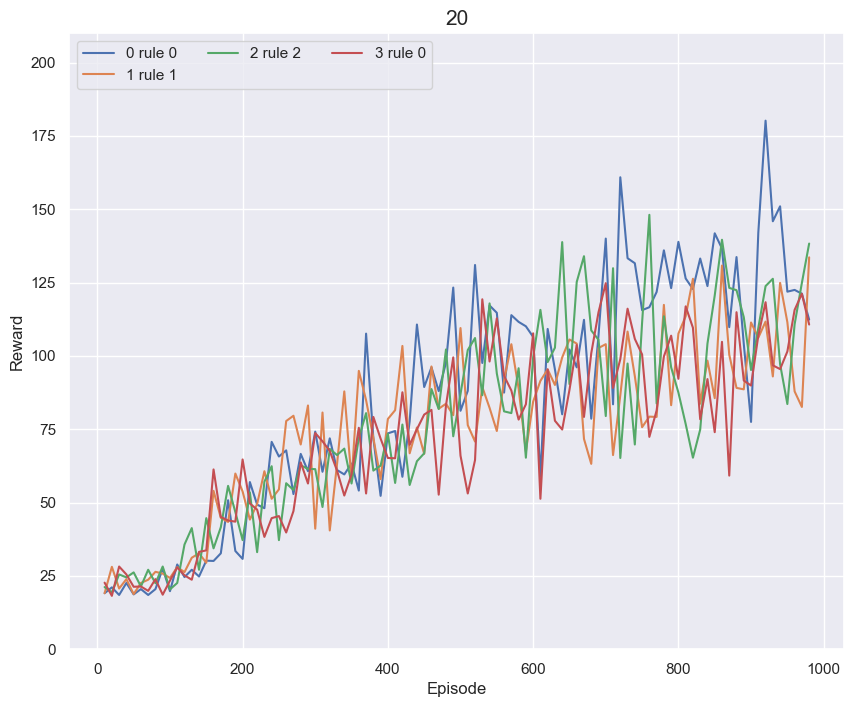

In [40]:
paths = load_data('run_0')
df = to_df(paths, min=0)
plot_returns(df, 20)
scores = get_scores(paths)
print(scores)

55
{'rule 74': 188.82, 'rule 160': 183.165, 'rule 2': 181.08, 'rule 24': 179.15, 'rule 136': 178.75, 'rule 152': 173.76, 'rule 8': 173.395, 'rule 168': 173.325, 'rule 72': 172.65, 'rule 44': 170.705, 'rule 40': 169.295, 'rule 172': 167.9, 'rule 32': 166.775, 'rule 128': 160.2, 'rule 4': 156.835, 'rule 36': 153.805, 'rule 76': 152.915, 'rule 26': 151.065, 'rule 104': 149.18, 'rule 130': 148.405, 'rule 34': 147.21, 'rule 232': 146.39, 'rule 18': 142.23, 'rule 140': 141.375, 'rule 108': 140.2, 'rule 33': 140.14, 'rule 146': 136.455, 'rule 162': 136.035, 'rule 134': 133.84, 'rule 41': 125.82, 'rule 200': 120.415, 'rule 164': 114.7, 'rule 12': 111.855, 'rule 132': 9.205, 'rule 29': 9.155, 'rule 7': 9.14, 'rule 170': 9.09, 'rule 23': 9.085, 'rule 37': 9.08, 'rule 110': 9.075, 'rule 178': 9.07, 'rule 46': 9.055, 'rule 43': 9.025, 'rule 42': 9.02, 'rule 54': 9.005, 'rule 156': 9.005, 'rule 9': 9.0, 'rule 78': 8.995, 'rule 22': 8.99, 'rule 45': 8.985, 'rule 90': 8.965, 'rule 51': 8.96, 'rule 73

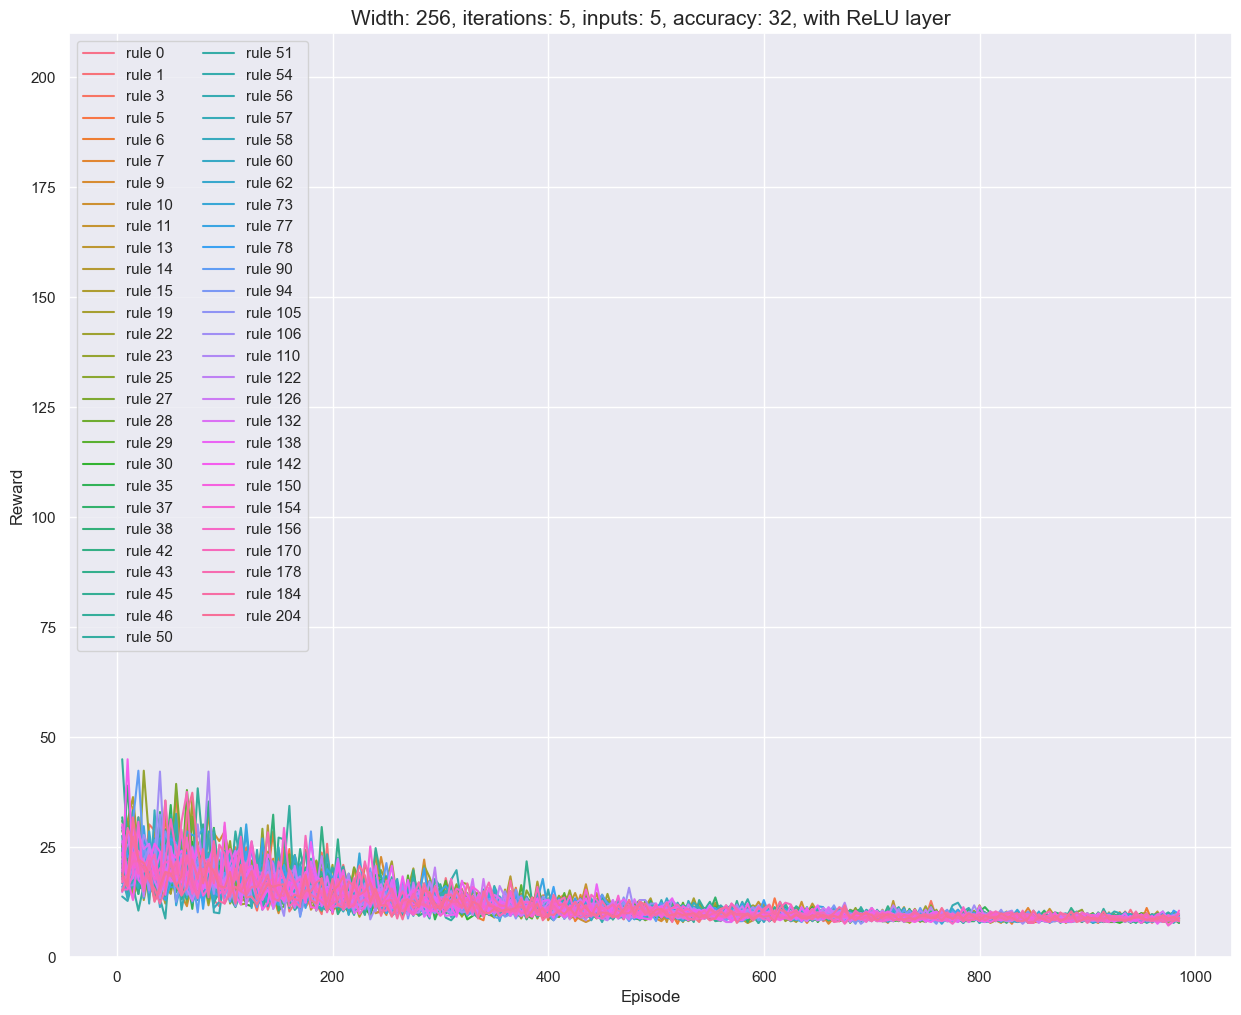

In [66]:
paths = load_data('run_4')
df = to_df(paths, min=50)
plot_returns(df, 'Width: 256, iterations: 5, inputs: 5, accuracy: 32, with ReLU layer', 5)
scores = get_scores(paths)
print(scores)

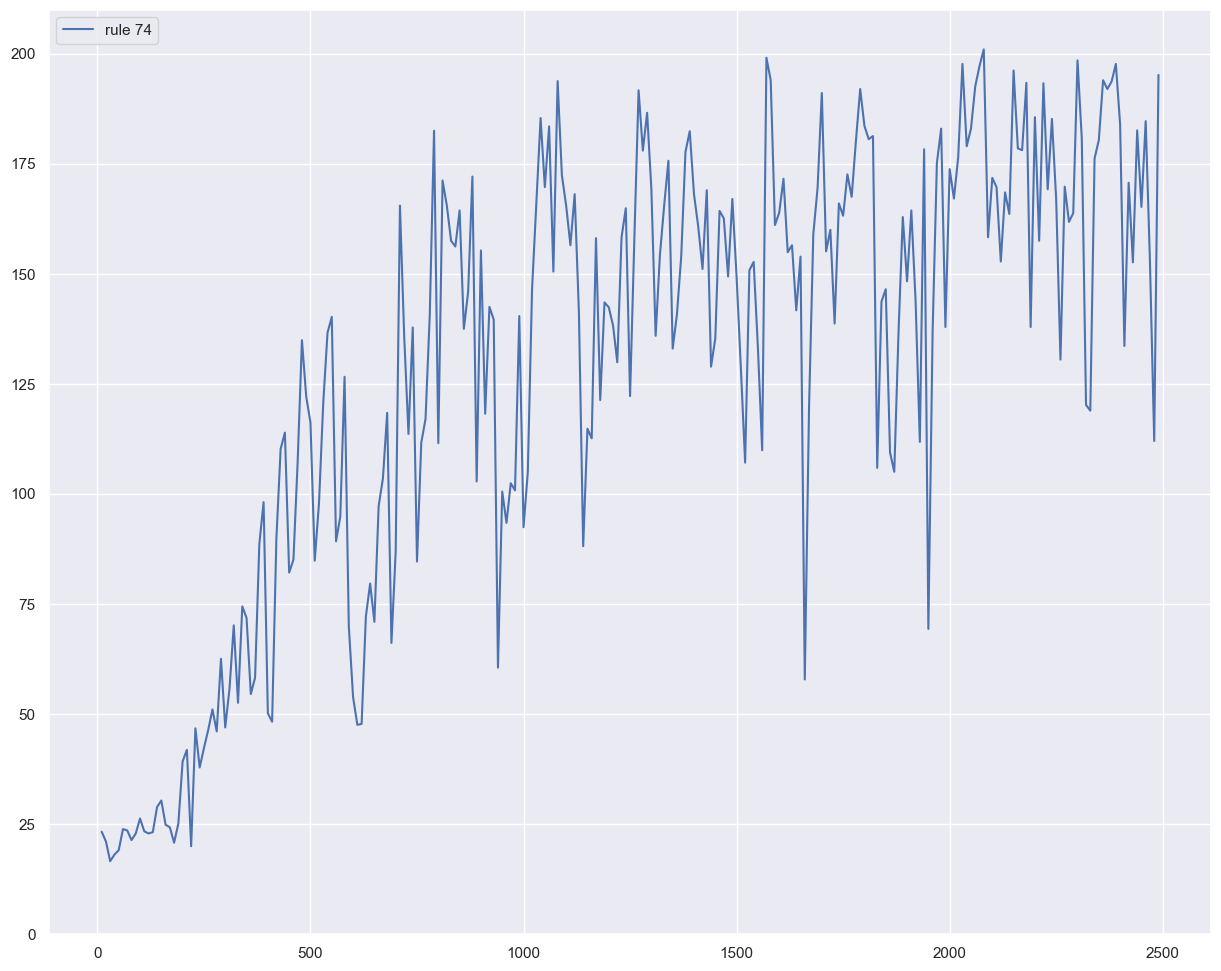

In [335]:
paths = load_data('test')
df = to_df(paths, min=50)
plot_returns(df)

{'rule 40': 173.95, 'rule 2': 161.335, 'rule 6': 152.88, 'rule 3': 150.75, 'rule 74': 150.385, 'rule 27': 145.785, 'rule 168': 143.19, 'rule 172': 143.095, 'rule 36': 138.155, 'rule 24': 136.035, 'rule 56': 134.08, 'rule 138': 131.635, 'rule 43': 131.39, 'rule 130': 131.08, 'rule 10': 128.51, 'rule 38': 127.155, 'rule 11': 127.025, 'rule 152': 124.65, 'rule 134': 122.68, 'rule 8': 122.0, 'rule 34': 121.69, 'rule 164': 121.685, 'rule 184': 120.925, 'rule 142': 120.14, 'rule 58': 120.06, 'rule 42': 118.33, 'rule 132': 116.655, 'rule 162': 116.3, 'rule 35': 115.92, 'rule 28': 115.455, 'rule 15': 113.245, 'rule 57': 111.95, 'rule 170': 109.715, 'rule 4': 108.615, 'rule 94': 107.935, 'rule 44': 105.98, 'rule 14': 104.655, 'rule 62': 104.485, 'rule 9': 103.965, 'rule 25': 103.78, 'rule 5': 103.73, 'rule 33': 103.58, 'rule 46': 102.62, 'rule 7': 101.11, 'rule 204': 100.47, 'rule 154': 100.02, 'rule 160': 99.465, 'rule 156': 99.425, 'rule 29': 98.595, 'rule 50': 97.89, 'rule 78': 97.875, 'rule

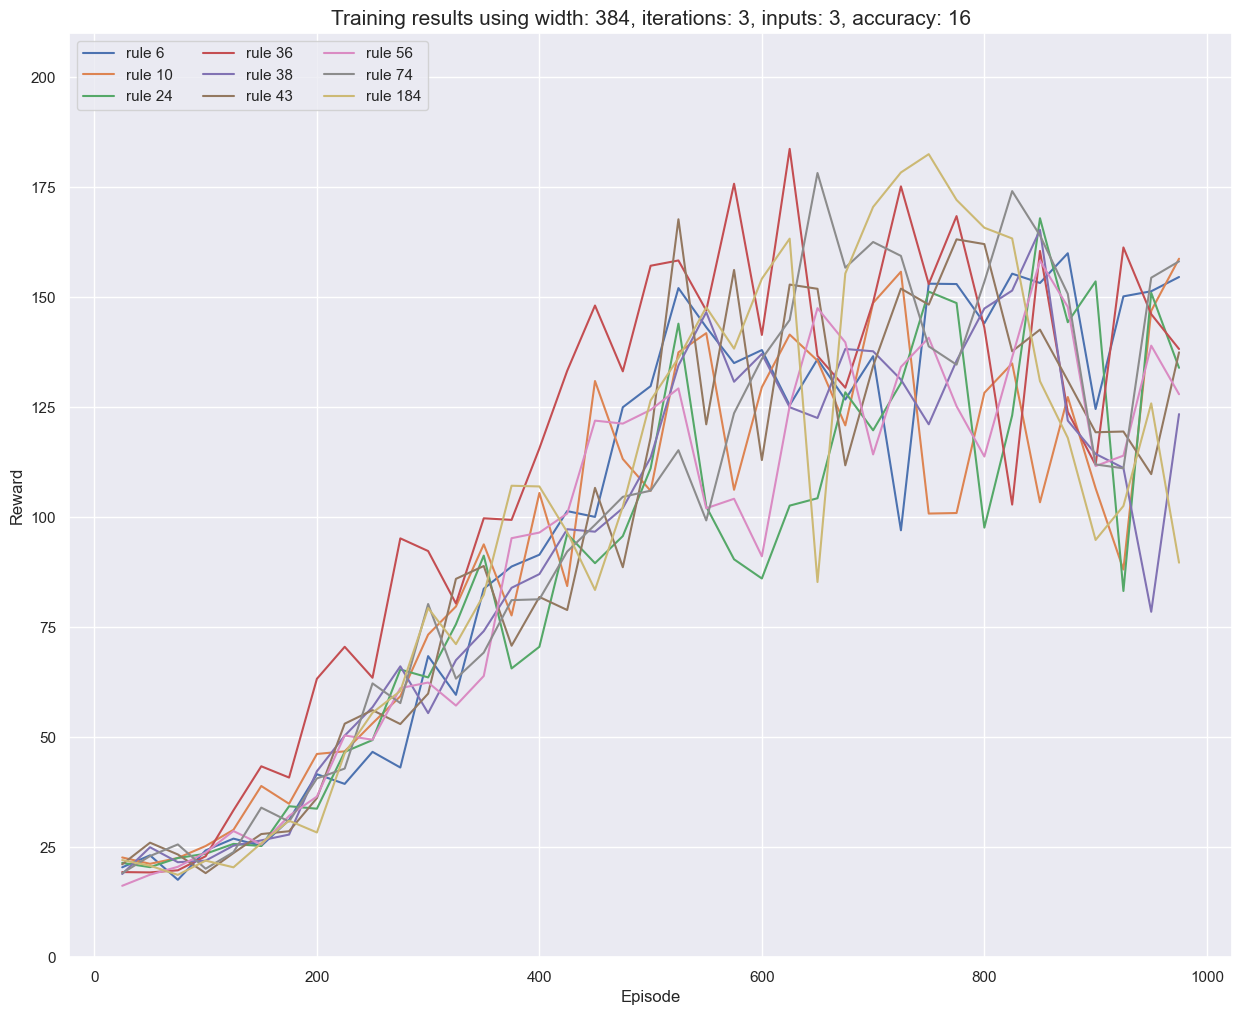

In [71]:
paths = load_data('run_5')
df = to_df(paths, eca_class='2', min=150)
plot_returns(df, 'Training results using width: 384, iterations: 3, inputs: 3, accuracy: 16', 25)
scores = get_scores(paths)
print(scores)

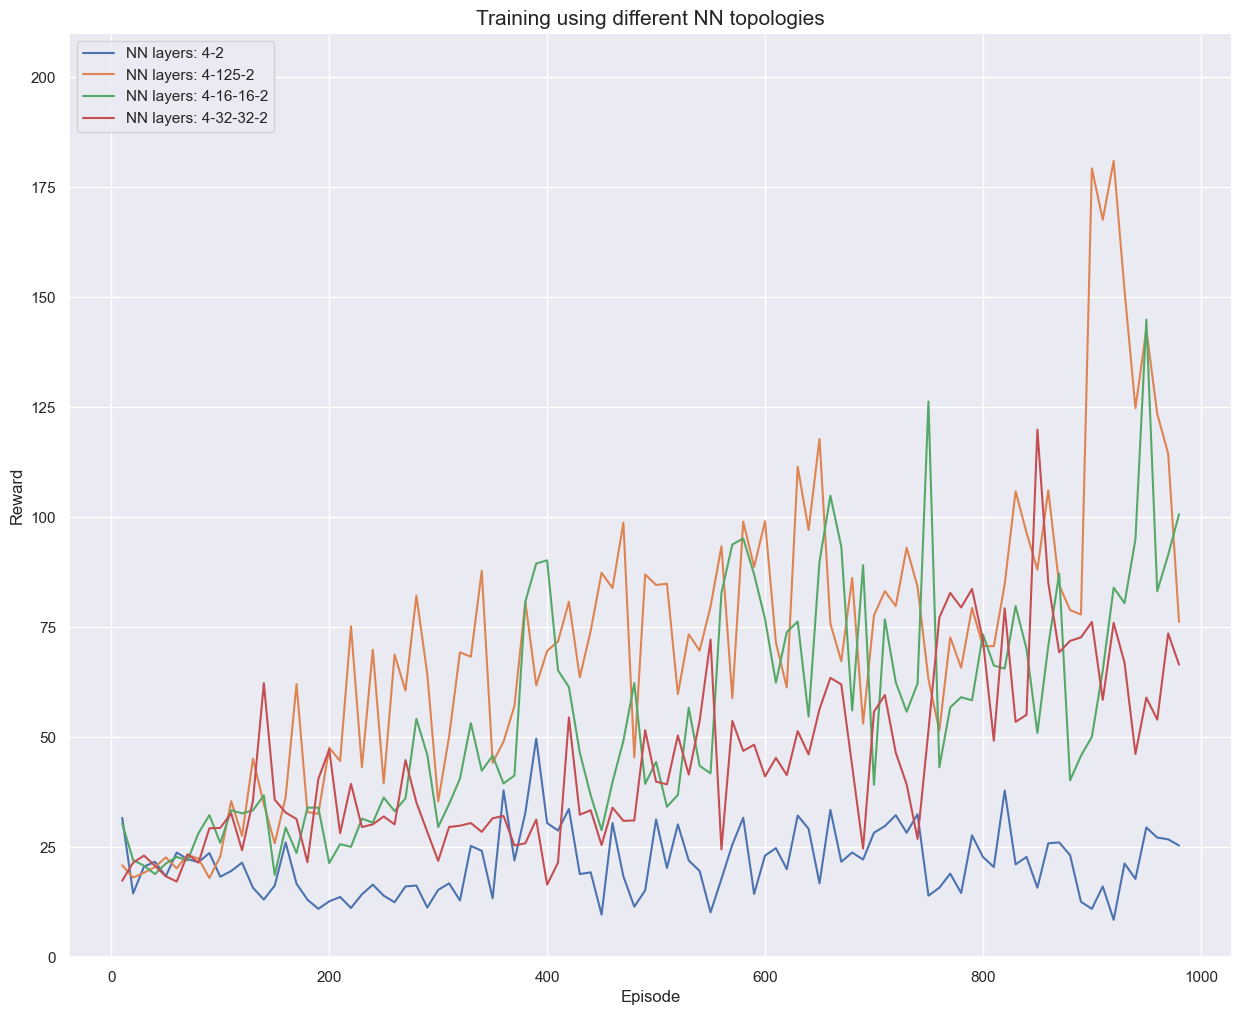

In [87]:
def nn_to_df(paths, eca_class = 'all', avg = 10, min = 20):
    datas = []
    max_len = 0
    for i in range(len(paths)):
        with open(paths[i], 'rb') as f:
            data = pickle.load(f)
            if len(data['rewards']) > max_len:
                max_len = len(data['rewards'])
            
            datas.append(data)

    df = pd.DataFrame()
    idx = 0
    i = 0
    for data in datas:
        if not eca_class == 'all' and data['rule'] not in eca_classes[eca_class]:
            continue
        
        if sum(data['rewards'][-avg:])/avg > min:
            while len(data['rewards']) < max_len:
                data['rewards'].append(None)

            raw = r'{}'.format(paths[i])
            name = raw.split('\\')[2].split('_')[1]
            df.insert(idx, f'NN layers: {name}', data['rewards'])
            idx += 1
        
        i += 1
    return df

paths = load_data('nn', False)
df = nn_to_df(paths, min=0)
plot_returns(df, 'Training using different NN topologies', 10)

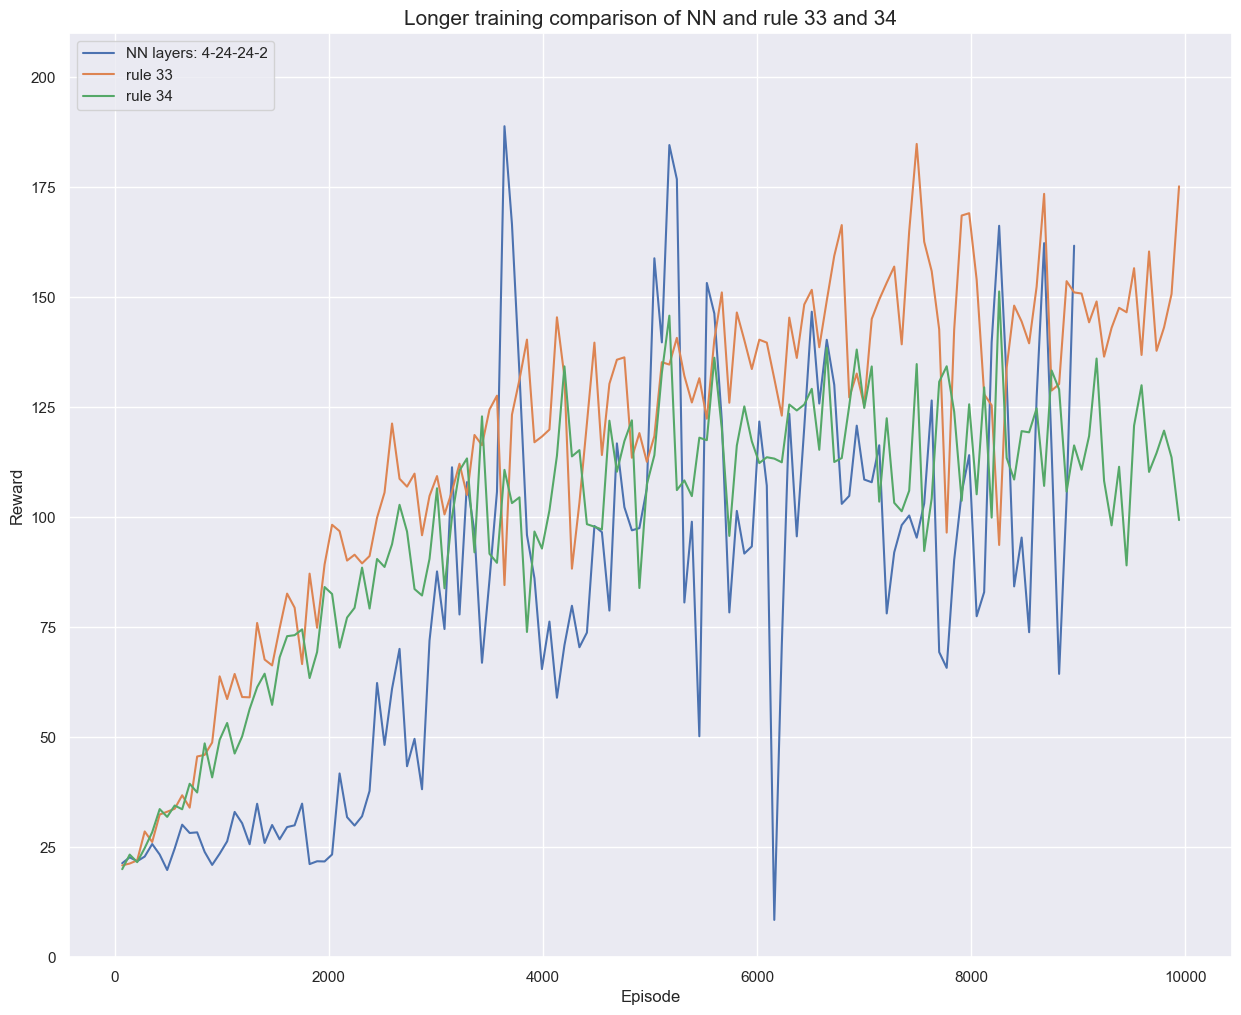

In [85]:
paths = load_data('nn_eca', False)
df = nn_to_df(paths, min=0)
plot_returns(df, 'Longer training comparison of NN and rule 33 and 34', 70)

{'rule 50': 198.86, 'rule 104': 181.285, 'rule 40': 176.495, 'rule 152': 175.59, 'rule 172': 171.81, 'rule 36': 169.285, 'rule 62': 166.16, 'rule 24': 162.65, 'rule 184': 162.53, 'rule 142': 161.86, 'rule 8': 159.51, 'rule 27': 158.94, 'rule 18': 157.99, 'rule 134': 152.795, 'rule 73': 151.49, 'rule 43': 151.415, 'rule 72': 151.405, 'rule 132': 151.2, 'rule 74': 149.99, 'rule 56': 149.155, 'rule 94': 148.14, 'rule 28': 146.97, 'rule 122': 146.235, 'rule 54': 146.07, 'rule 154': 145.075, 'rule 57': 144.755, 'rule 162': 144.28, 'rule 29': 143.975, 'rule 46': 143.89, 'rule 140': 143.69, 'rule 25': 142.17, 'rule 108': 141.43, 'rule 32': 140.94, 'rule 105': 140.32, 'rule 9': 140.245, 'rule 7': 139.015, 'rule 22': 138.62, 'rule 150': 138.605, 'rule 106': 138.08, 'rule 160': 136.55, 'rule 23': 136.09, 'rule 37': 134.205, 'rule 44': 134.07, 'rule 41': 133.83, 'rule 5': 132.815, 'rule 14': 131.005, 'rule 110': 129.895, 'rule 60': 129.765, 'rule 35': 128.665, 'rule 178': 127.745, 'rule 45': 126.

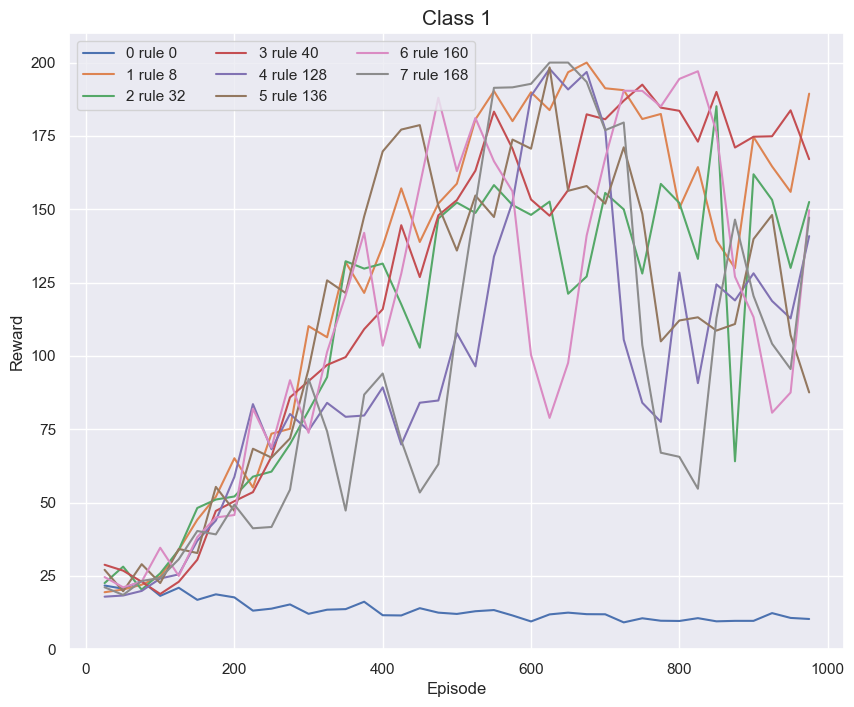

In [10]:
paths = load_data('run_6')
# paths = paths[20:]
df = to_df(paths, eca_class='1', min=0)
plot_returns(df, 'Class 1', 25)
scores = get_scores(paths)
print(scores)

{'rule 106': 173.00921453599523, 'rule 40': 169.98957322161172}


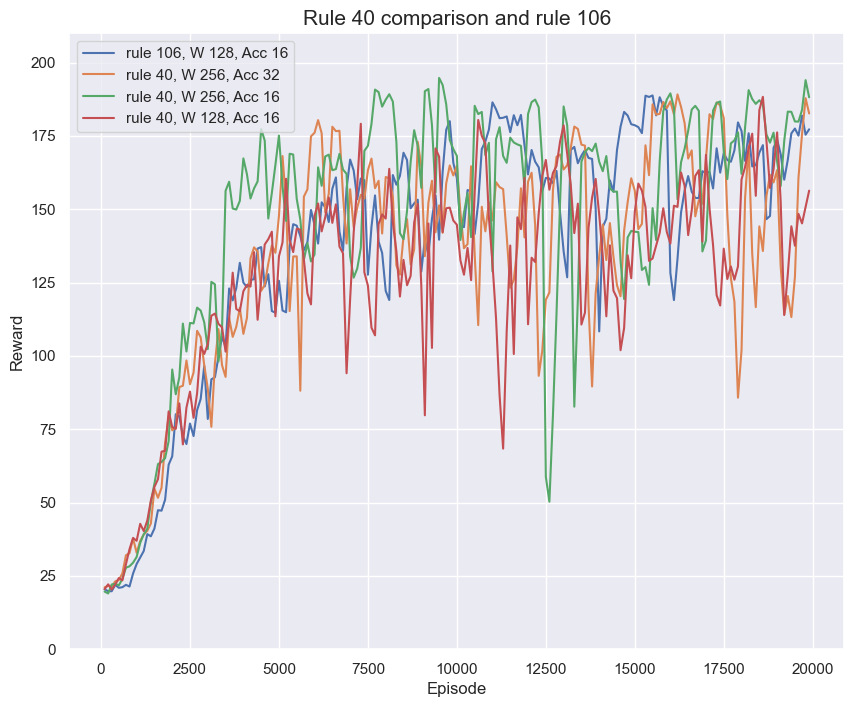

In [74]:
paths = load_data('run_7')
df = to_df(paths, min=0, include_name=True)
plot_returns(df, 'Rule 40 comparison and rule 106', 100)
scores = get_scores(paths)
print(scores)

{'rule 8': 79.01}


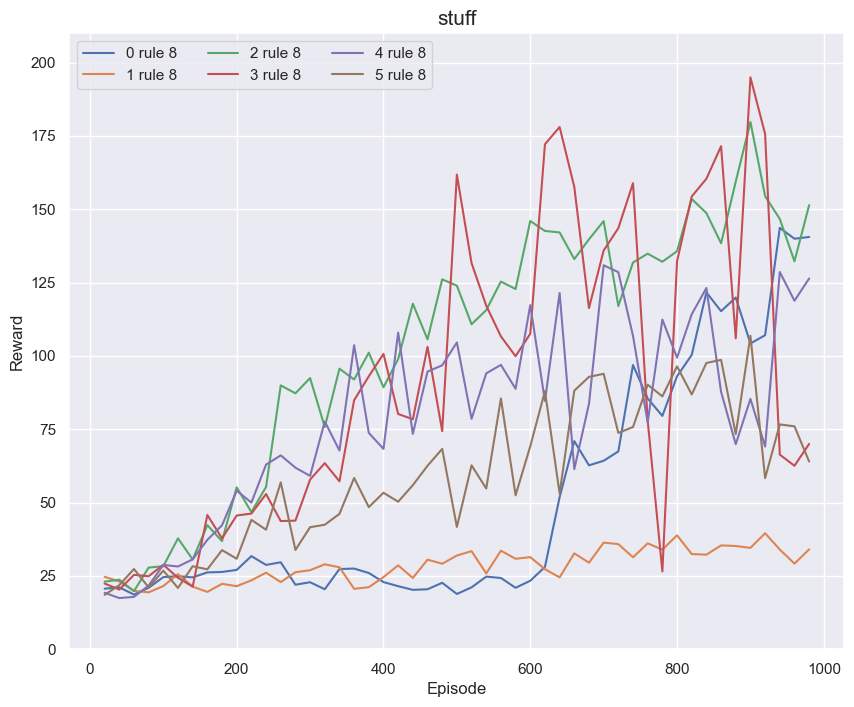

In [26]:
paths = load_data('run_8')
df = to_df(paths, min=0)
plot_returns(df, 'stuff', 20)
scores = get_scores(paths)
print(scores)

{'rule 29': 186.255, 'rule 8': 175.875, 'rule 36': 174.13, 'rule 38': 171.82, 'rule 18': 171.7, 'rule 44': 171.02, 'rule 35': 169.87, 'rule 24': 167.26, 'rule 23': 166.25, 'rule 12': 165.965, 'rule 4': 164.365, 'rule 62': 162.755, 'rule 14': 162.385, 'rule 54': 162.08, 'rule 7': 161.805, 'rule 22': 161.34, 'rule 58': 160.41, 'rule 32': 159.59, 'rule 42': 158.82, 'rule 33': 158.785, 'rule 10': 157.99, 'rule 19': 157.405, 'rule 76': 157.34, 'rule 5': 155.88, 'rule 30': 155.375, 'rule 6': 154.585, 'rule 9': 154.08, 'rule 26': 150.935, 'rule 73': 150.92, 'rule 57': 149.65, 'rule 41': 149.49, 'rule 2': 149.445, 'rule 27': 148.465, 'rule 74': 147.39, 'rule 3': 145.07, 'rule 45': 144.155, 'rule 11': 142.48, 'rule 46': 141.37, 'rule 56': 140.265, 'rule 25': 139.795, 'rule 34': 138.7, 'rule 13': 138.69, 'rule 28': 137.675, 'rule 40': 137.495, 'rule 37': 134.865, 'rule 77': 131.97, 'rule 43': 128.265, 'rule 50': 126.885, 'rule 60': 126.365, 'rule 15': 125.58, 'rule 1': 109.385, 'rule 0': 107.01,

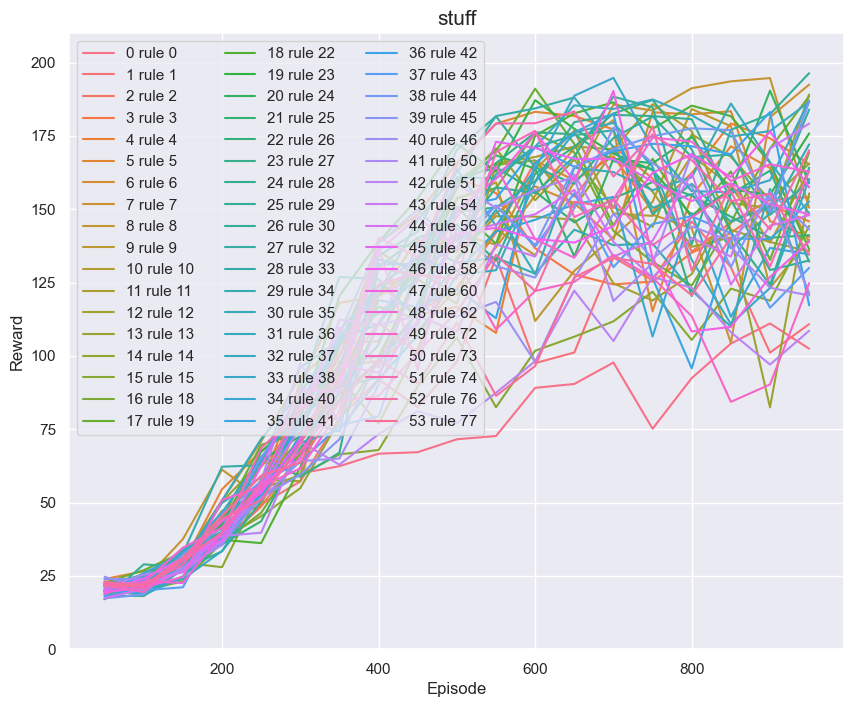

In [36]:
paths = load_data('run_10')
df = to_df(paths, min=0)
plot_returns(df, 'stuff', 50)
scores = get_scores(paths)
print(scores)

{'rule 110': 154.555}


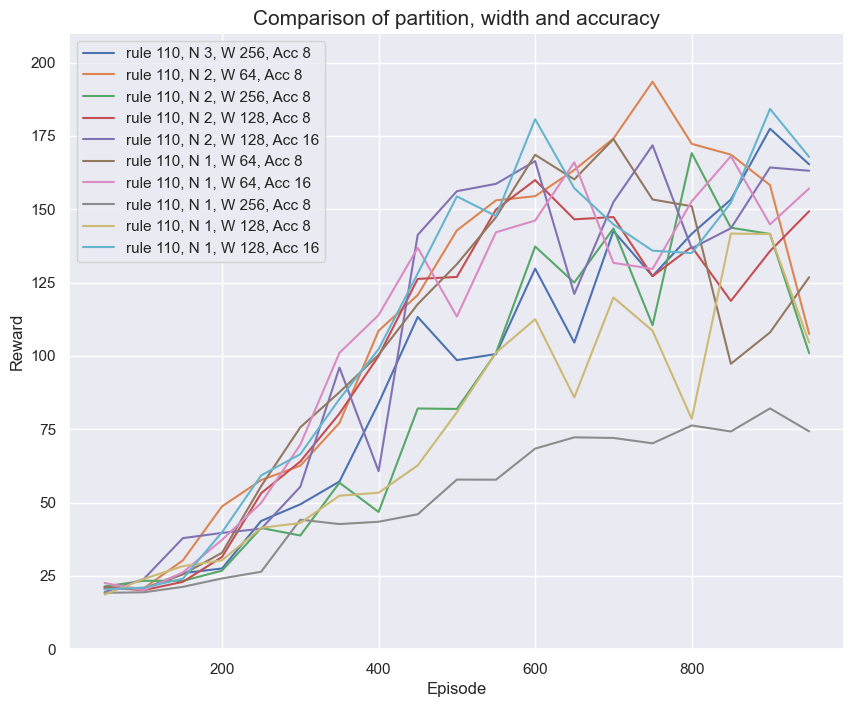

In [69]:
paths = load_data('run_12')
df = to_df(paths, min=0, include_name=True)
plot_returns(df, 'Comparison of partition, width and accuracy', 50)
scores = get_scores(paths)
print(scores)